# Chapter 3
**Author:** Veasna Bun  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## Section 3.1: Measures of Center
---

### **Mean:** 
The average of a set of data. It is calculated by dividing the sum of all data values by the number of data values, denoted as *n*.
### **Weighted Mean:** 
The average of a data set where each data value is assigned a specific weight, reflecting its importance. It is calculated by multiplying each data value by its corresponding weight, summing these products, and then dividing by the total of the weights.
### **Median:** 
The middle data value when the data set is ordered from least to greatest. If there is an odd number of values, the median is the middle value. If the data set has an even number of values, the median is the average of the two middle values.data set with an even number of values.
### **Mode:** 
The data value(s) that occur most frequently in a data set. A data set can have:
+ No mode (if no value repeats)
+ One mode (unimodal)
+ Two modes (bimodal)
+ Or several modes (multimodal)

In [5]:
# Example show Mean, Median, Mode, and more (Weighted Mean is not included)
# Descriptive Statistics 

# Sample data
data = [4, 7, 8, 3, 6, 8, 7, 5, 9, 8, 3, 6, 7, 10, 7]

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['Data'])

# Descriptive statistics
descriptive_stats = df.describe()

# Calculate mode separately, as describe does not include mode
mode = df['Data'].mode()

print(descriptive_stats)
print("Mode:", mode[0])

            Data
count  15.000000
mean    6.533333
std     2.065591
min     3.000000
25%     5.500000
50%     7.000000
75%     8.000000
max    10.000000
Mode: 7


### Choosing the Appropriate Measure
#### **Mode for Qualitative Data:** 
When dealing with categorical or qualitative data (e.g., gender, color, brand preference), the mode is the most appropriate measure, as it indicates the most frequent category in the data set.
#### **Mean for Quantitative Data:** 
For quantitative data (e.g., heights, ages, test scores), the mean is typically used because it represents the average. However, this is only recommended when the data set does not contain significant outliers or is not skewed. Outliers can distort the mean, making it less representative of the data as a whole.
#### **Median for Skewed or Outlier-Heavy Quantitative Data:** 
If the data set is skewed (i.e., has a long tail to the left or right) or contains outliers (extreme values that differ significantly from the rest of the data), the median is a better measure of central tendency. This is because the median is not affected by extreme values and thus provides a better central location for skewed data.

---
## Section 3.2.1: Measures of Spread or Dispersion
---

### **Range:** 
The range is a measure of the spread of a data set. It is calculated by subtracting the smallest (least) data value from the largest (greatest) data value:
$$
Range = max(data) - min(data)
$$

### **Variance:**  
Variance measures the degree to which each data point in a set differs from the mean. In other words, it quantifies the spread or dispersion of the data points around the mean. A higher variance indicates that the data points are more spread out, while a lower variance shows that they are closer to the mean.

#### Population Variance: 
$$
\sigma^2 = \frac{\sum_{}^{} (x_i - \mu)^2}{N}
$$
#### Sample Variance:
$$
s^2 = \frac{\sum_{}^{} (x_i - \bar{x})^2}{n-1}
$$

In [9]:
# Example data
data = [5, 7, 8, 12, 15, 18, 22, 25, 27, 30, 32, 35, 37, 40]
# Convert data to a pandas Series
data_series = pd.Series(data)
# Calculate population variance
population_variance = data_series.var(ddof=0)
# Calculate sample variance
sample_variance = data_series.var()
print("Population Variance:", population_variance)
print("Sample Variance:", sample_variance)

Population Variance: 127.80102040816325
Sample Variance: 137.63186813186812


### **Standard Deviation:** 
The standard deviation is a measure of how much we might expect a typical member of the data set to differ from the mean.

#### Population Standard Deviation: 
$$
\sigma = \sqrt{\frac{\sum_{}^{} (x_i - \mu)^2}{N}}
$$
#### Sample Standard Deviation:
$$
s = \sqrt{\frac{\sum_{}^{} (x_i - \bar{x})^2}{n-1}}
$$
+ If the standard deviation is small, the data is less spread out.
+ If the standard deviation is large, the data is more spread out.

While both variance and standard deviation indicate how spread out the data is, the Standard Deviation is often more intuitive because it is in the same units as the original data, making it easier to interpret.

In [11]:
# Calculate population standard deviation
population_std = data_series.std(ddof=0)
print("Population Standard Deviation:", population_std)

# Calculate sample standard deviation
sample_std = data_series.std()
print("Sample Standard Deviation:", sample_std)

Population Standard Deviation: 11.304911340128381
Sample Standard Deviation: 11.731660928098293


---
## Section 3.2.2: Empirical Rule and Chebyshev's Theorem
---

### Empirical Rule
The **Empirical Rule**, also known as the **68-95-99.7 Rule**, provides useful insights about the distribution of data when it follows a **normal distribution** (bell-shaped curve). 
+ 68% of the data falls within 1 standard deviation of the mean:
  $$\mu - \sigma \leq x \leq \mu + \sigma$$
+ 95% of the data falls within 2 standard deviations of the mean:
  $$\mu - 2\sigma \leq x \leq \mu + 2\sigma$$
+ 99.7% of the data falls within 3 standard deviations of the mean:
  $$\mu - 3\sigma \leq x \leq \mu + 3\sigma$$

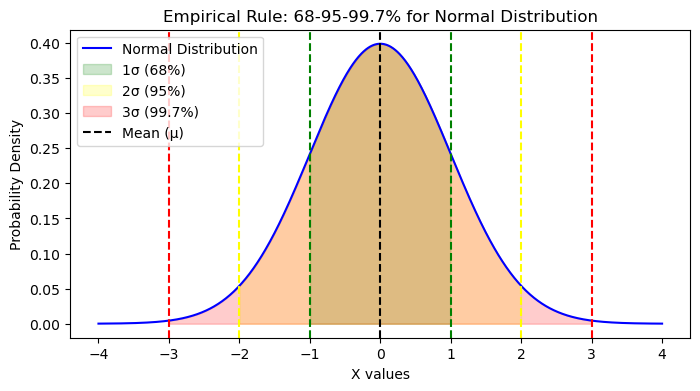

In [14]:
# Parameters for the normal distribution

# Mean
mu = 0 
# Standard deviation
sigma = 1  
# Range for the x-axis (4 std deviations)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  # Range for the x-axis (4 std deviations)
# Normal distribution formula
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)  # Normal distribution formula

# Plot the bell curve (normal distribution)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Fill areas according to the Empirical Rule
plt.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color='green', alpha=0.2, label='1σ (68%)')
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='yellow', alpha=0.2, label='2σ (95%)')
plt.fill_between(x, y, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='red', alpha=0.2, label='3σ (99.7%)')

# Add vertical lines for mean and standard deviations
plt.axvline(mu, color='black', linestyle='--', label='Mean (μ)')
plt.axvline(mu - sigma, color='green', linestyle='--')
plt.axvline(mu + sigma, color='green', linestyle='--')
plt.axvline(mu - 2*sigma, color='yellow', linestyle='--')
plt.axvline(mu + 2*sigma, color='yellow', linestyle='--')
plt.axvline(mu - 3*sigma, color='red', linestyle='--')
plt.axvline(mu + 3*sigma, color='red', linestyle='--')

# Add labels and title
plt.title('Empirical Rule: 68-95-99.7% for Normal Distribution', fontsize=12)
plt.xlabel('X values', fontsize=10)
plt.ylabel('Probability Density', fontsize=10)

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()

### Chebyshev's Theorem for Other Distributions 
While the **Empirical Rule** is specifically for bell-shaped (normal) distributions, **Chebyshev's Theorem** applies to any distribution, regardless of its shape. This theorem provides a way to estimate the minimum proportion of data that lies within a certain number of standard deviations from the mean, even when the data is not normally distributed.

For any distribution (not necessarily normal), the proportion of data that lies within *k* standard deviations from the mean is at least:
$$
1 - \frac{1}{k^2}
$$

Where $k > 1$ is the number of standard deviations from the mean.

+  **At least 75%** of the data falls within **2 standard deviations** of the mean $(k = 2)$:
$$
1 - \frac{1}{2^2} = 1 - \frac{1}{4} = 0.75
$$
+  **At least 89%** of the data falls within **3 standard deviations** of the mean $(k = 3)$:
$$
1 - \frac{1}{3^2} = 1 - \frac{1}{9} = 0.888\overline{8}
$$
+  **At least 94%** of the data falls within **4 standard deviations** of the mean $(k = 4)$:
$$
1 - \frac{1}{4^2} = 1 - \frac{1}{16} = 0.9375
$$

---
## Section 3.3.1: Measures of Relative Position
---

### Percentiles
**Percentiles** are a statistical measure used to understand the relative position of a value within a dataset. They divide the data into 100 equal parts, each representing 1% of the data. This helps in identifying the position of a value relative to the rest of the data.
+ The $P^{th}$ percentile is the value below which $P%$ of the observations in a dataset fall.
+ **Location Formula:** To find the location $l$ of the $P^{th}$ percentile in a dataset with $n$ data point, use the formula:
    + $l = n \cdot \frac{P}{100}$, where $n$ is the number of data points in the dataset.
    + Here, $l$ is the position in the sorted dataset.
    + If $l$ is not an integer, round up to the next whole number.
    + If $1$ is an integer, the percentile value is the average of the data values at $l$ and $l + 1$. 
+ **Percentile Formula:** To find the percentile rank $P$ of a specific value in a dataset, use the formula:
    + $P = \frac{l}{n} \cdot 100$
    + $l$ is the position of the value, and $n$ is the total number of data points.

In [19]:
# Example data
data = [5, 7, 8, 12, 15, 18, 22, 25, 27, 30, 32, 35, 37, 40]

# Convert data to a pandas Series
data_series = pd.Series(data)

# Define the desired percentile
percentile = 30  
# Find the value at the given percentile
percentile_value = data_series.quantile(percentile / 100)
print(f"The {percentile}th percentile value is: {percentile_value}")

# To find the percentile rank of a specific value
value = 22  # Example value
# Calculate the percentile rank using the rank method
percentile_rank = (data_series.rank(pct=True) * 100).loc[data_series == value].values[0]
print(f"The percentile rank of the value {value} is: {percentile_rank}")

The 30th percentile value is: 14.7
The percentile rank of the value 22 is: 50.0


### Quartiles

Quartiles are statistical values that divide a dataset into four equal parts, each representing 25% of the data. Quartiles help in understanding the spread and distribution of data by identifying key points in the dataset.

#### The Three Quartiles:

1. **First Quartile (Q1)**:
   - Also known as the lower quartile, $Q_1$ represents the 25th percentile. It is the value below which 25% of the data fall. $Q_1$ separates the lowest 25% of data from the rest.
   
2. **Second Quartile (Q2)**:
   - This is the 50th percentile, also known as the median. It divides the data into two equal halves, with 50% of the data below this value and 50% above.
   
3. **Third Quartile (Q3)**:
   - Also known as the upper quartile, $Q_3$ represents the 75th percentile. It is the value below which 75% of the data fall, separating the highest 25% from the rest.

#### Interquartile Range (IQR):
- The interquartile range is a measure of the spread of the middle 50% of the data and is calculated as:
  $$\text{IQR} = Q_3 - Q_1$$
- The IQR helps in identifying the variability of the data and detecting outliers.
- Values outside the range of $Q_1 - 1.5 \times \text{IQR}, Q_3 + 1.5 \times \text{IQR}$ are often considered outliers.

#### Calculation:
- **$Q_1$** is the value at the 25th percentile.
- **$Q_2$ (median)** is the value at the 50th percentile.
- **$Q_3$** is the value at the 75th percentile.


In [21]:
# Example dataset
data = [5, 7, 8, 12, 15, 18, 22, 25, 27, 30, 32, 35, 37, 40]

# Convert data to a pandas Series
data_series = pd.Series(data)

# Calculate Q1 (25th percentile), Q2 (50th percentile), and Q3 (75th percentile)
Q1 = data_series.quantile(0.25)
Q2 = data_series.quantile(0.50)
Q3 = data_series.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile, Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identify outliers
outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
print(f"Outliers: {outliers.tolist()}")

Q1 (25th percentile): 12.75
Q2 (50th percentile, Median): 23.5
Q3 (75th percentile): 31.5
Interquartile Range (IQR): 18.75
Lower bound for outliers: -15.375
Upper bound for outliers: 59.625
Outliers: []


---
## Section 3.3.2: Box Plots and the Five-Number Summary
---

### Box Plots

A **box plot** (or **box-and-whisker plot**) is a graphical representation of a dataset that visually displays the distribution, central tendency, and variability. It summarizes the data using five key statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum, and can help identify outliers.

#### Key Components of a Box Plot:
1. **The Box**: 
   - The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3).
   - The left (or bottom) edge of the box marks **Q1** (25th percentile), and the right (or top) edge marks **Q3** (75th percentile).

2. **The Median (Q2)**:
   - A line inside the box represents the **median** (Q2), which is the 50th percentile. Half the data points fall below this value, and half are above.

3. **The Whiskers**:
   - The whiskers extend from the edges of the box to the smallest and largest data points that are **not outliers**.
   - The whiskers typically extend to the minimum and maximum data values within \( 1.5 \times \text{IQR} \) from Q1 and Q3, respectively.

4. **Outliers**:
   - Data points that fall outside \( 1.5 \times \text{IQR} \) from Q1 or Q3 are considered **outliers** and are usually marked as individual points outside the whiskers.


### 5-Number Summary

The **5-number summary** is a set of descriptive statistics that provides key information about a dataset. It consists of:
1. **Minimum**: The smallest value in the dataset.
2. **First Quartile (Q1)**: The 25th percentile, which separates the lowest 25% of the data.
3. **Median (Q2)**: The 50th percentile, which divides the data into two equal halves.
4. **Third Quartile (Q3)**: The 75th percentile, which separates the highest 25% of the data.
5. **Maximum**: The largest value in the dataset.

The 5-number summary is especially useful for understanding the spread of the data and detecting potential outliers when paired with a box plot.

Q1 (25th percentile): 12.75
Q2 (50th percentile, Median): 23.5
Q3 (75th percentile): 31.5
Interquartile Range (IQR): 18.75
Lower bound for outliers: -15.375
Upper bound for outliers: 59.625
Outliers: []


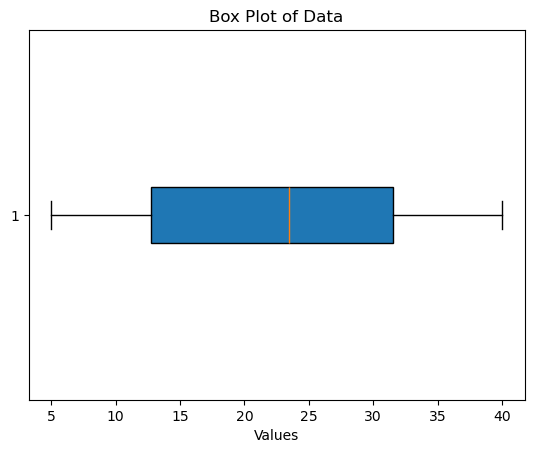

In [25]:
# Example dataset
data = [5, 7, 8, 12, 15, 18, 22, 25, 27, 30, 32, 35, 37, 40]

# Convert data to a pandas Series
data_series = pd.Series(data)

# Calculate the 5-number summary
minimum = data_series.min()
Q1 = data_series.quantile(0.25)
median = data_series.median()  # Q2
Q3 = data_series.quantile(0.75)
maximum = data_series.max()

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile, Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identify outliers
outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
print(f"Outliers: {outliers.tolist()}")

# Create a box plot
plt.boxplot(data_series, vert=False, patch_artist=True)
plt.title("Box Plot of Data")
plt.xlabel("Values")
plt.show()

---
## Section 3.3.3: Intro to Z-Scores
---

### Z-Score Definition
A z-score, or standard score, quantifies how many standard deviations a data point is away from the mean of the distribution. It standardizes scores from different distributions to make them comparable.

**1. Population Z-Score:**

When dealing with a population, the z-score is calculated using:
$$
z = \frac{(X - \mu)}{\sigma}
$$

where:
- $X$ = the value of the data point
- $\mu$ = the population mean
- $\sigma$ = the population standard deviation

**2. Sample Z-Score:**

When dealing with a sample, the z-score is calculated using:
$$
z = \frac{(X - \bar{X})}{s}
$$
where:
- $X$ = the value of the data point
- $\bar{X}$ = the sample mean
- $s$ = the sample standard deviation

#### Interpretation
- A z-score of 0 indicates the data point is exactly at the mean.
- Positive z-scores indicate the data point is above the mean.
- Negative z-scores indicate the data point is below the mean.
- The magnitude of the z-score shows the distance from the mean in terms of standard deviations.


In [28]:
# Sample data
data = pd.Series([10, 20, 30, 40, 50]) 

# Calculate mean and standard deviation for population
population_mean = data.mean()
# ddof=0 for population standard deviation
population_std = data.std(ddof=0)  
# Calculate z-scores for population
population_z_scores = (data - population_mean) / population_std

# Calculate mean and standard deviation for sample
sample_mean = data.mean()
# ddof=1 for sample standard deviation
sample_std = data.std(ddof=1)
# Calculate z-scores for sample
sample_z_scores = (data - sample_mean) / sample_std

# Display results
print("Population Z-Scores:")
print(population_z_scores)

print("\nSample Z-Scores:")
print(sample_z_scores)

Population Z-Scores:
0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
dtype: float64

Sample Z-Scores:
0   -1.264911
1   -0.632456
2    0.000000
3    0.632456
4    1.264911
dtype: float64


---
### Up Next Chapter 4 ...
---